# 
<h1 style="
background-color: #2E073F;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: center;
font-family: 'Arial', sans-serif;
font-size: 2.5em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 2px 2px 2px #fff;
margin-right: 20px; /* Space between text and GIF */
">Student Examination Performance Analyzer</h1>


<center>
<img src="https://img.freepik.com/premium-photo/3d-boy-reading-book-lying-down-floor_646181-7505.jpg?size=626&ext=jpg&ga=GA1.1.720551948.1705646383&semt=ais_hybrid" alt="Student" width=60% style="border-radius:25px">
</center>

<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
📚 Importing Libraries
</h1>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

sns.set_style('dark')
warnings.filterwarnings('ignore')

<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
📥 Data Loading and Basic Exploration
</h1>

In [2]:
# loading data
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# shape 
df.shape

(1000, 8)

In [4]:
# information
df.info(show_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   gender                       object
 1   race/ethnicity               object
 2   parental level of education  object
 3   lunch                        object
 4   test preparation course      object
 5   math score                   int64 
 6   reading score                int64 
 7   writing score                int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
# list of features
df.columns.tolist()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [6]:
# description
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<body>
<div style="
background-color: #EBD3F8;
color: #7A1CAC;
padding-left: 10px;
padding-top: 10px;
border-radius: 8px;
font-family: 'Arial', sans-serif;
font-size: 1.4em;
font-weight: narrow;
margin: 0;
line-height: 1.6;
">

Summary of Data Loading and Basic Exploration<br>

<ul>
<li>📏 <strong>Data Shape:</strong> The dataset consists of 1000 rows and 8 columns.</li>
<li>ℹ️ <strong>Data Information:</strong> Includes 5 categorical and 3 numerical columns, with no missing values.</li>
<li>📝 <strong>List of Features:</strong> Contains columns for demographics, preparation courses, and academic scores.</li>
<li>📊 <strong>Descriptive Statistics:</strong> Provides mean and range for math, reading, and writing scores.</li>
</ul>

</div>
</body>


<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
🧹 Data Cleaning
</h1>


In [7]:
# null data
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
# duplicate data
df.duplicated().sum()

0

<body>
<div style="
background-color: #EBD3F8;
color: #7A1CAC;
padding-left: 10px;
padding-top: 10px;
border-radius: 8px;
font-family: 'Arial', sans-serif;
font-size: 1.4em;
font-weight: narrow;
margin: 0;
line-height: 1.6;
">

Summary of Data Cleaning<br>

<ul>
<li>❌ <strong>Null Data:</strong> No missing values in any columns.</li>
<li>🔍 <strong>Duplicate Data:</strong> No duplicate entries found.</li>
</ul>

</div>
</body>


<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
🔢 Feature Encoding
</h1>


In [9]:
df['gender'] = df['gender'].map({'male':1, 'female':0})

df['race/ethnicity'] = df['race/ethnicity'].map(
                            {"group A":0, 
                             "group B":1, 
                             "group C":2, 
                             "group D":3, 
                             "group E":4})

df['parental level of education'] = df['parental level of education'].map(
                                       {'some high school': 0,
                                        'high school': 1,
                                        'some college': 2,
                                        'associate\'s degree': 3,
                                        'bachelor\'s degree': 4,
                                        'master\'s degree': 5})

df['lunch'] = df['lunch'].map({'standard':1, 'free/reduced':0})

df['test preparation course'] = df['test preparation course'].map({'none':0, 'completed':1})

<body>
<div style="
background-color: #EBD3F8;
color: #7A1CAC;
padding-left: 10px;
padding-top: 10px;
border-radius: 8px;
font-family: 'Arial', sans-serif;
font-size: 1.4em;
font-weight: narrow;
margin: 0;
line-height: 1.6;
">

Summary of Feature Encoding<br>

<p>To prepare the dataset for analysis and modeling, the following categorical features were encoded:</p>

<ul>
<li>👩‍⚕️ <strong>Gender:</strong> Encoded as 1 for male and 0 for female.</li>
<li>🌍 <strong>Race/Ethnicity:</strong> Mapped to numerical values from 0 to 4 representing different groups, with group A as 0 and group E as 4.</li>
<li>🎓 <strong>Parental Level of Education:</strong> Converted to ordinal values reflecting educational levels, with some high school as 0 and master's degree as 5.</li>
<li>🍲 <strong>Lunch:</strong> Encoded as 1 for standard and 0 for free/reduced.</li>
<li>📚 <strong>Test Preparation Course:</strong> Mapped to 1 for completed and 0 for none.</li>
</ul>

</div>
</body>


<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
📊 Exploratory Data Analysis
</h1>


<h2 style="
background-color: #EBD3F8;
color: #2E073F;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 1.6em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
">
1. Univariate Analysis 
</h2>


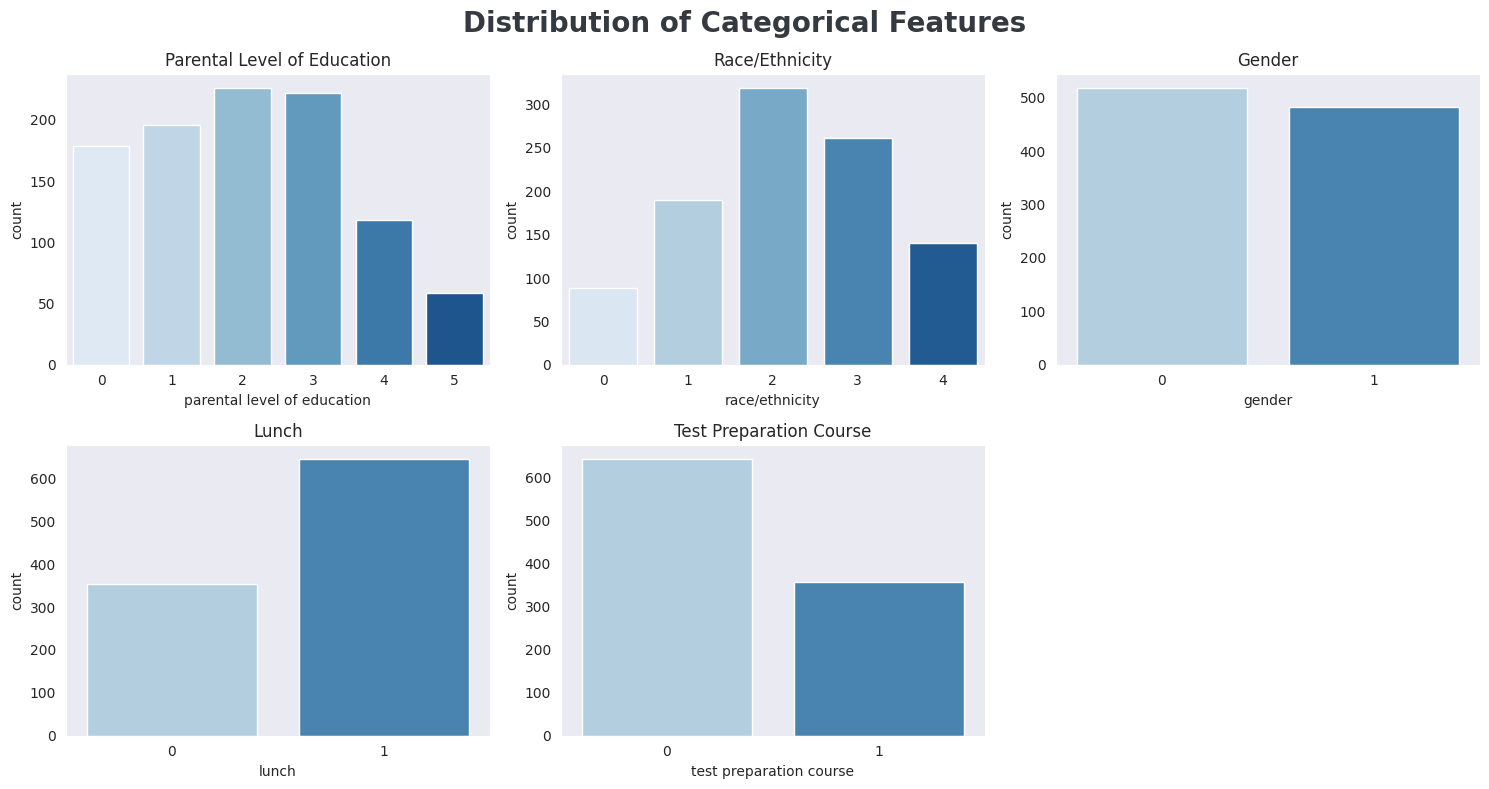

In [10]:
# creating a new features
df['Total Score'] = df['reading score'] + df['writing score'] + df['math score']

# Catrgorical Features Distribution
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,8))
axs=axs.flatten()

sns.countplot(data = df, x='parental level of education', palette='Blues', ax=axs[0])
axs[0].set_title("Parental Level of Education")

sns.countplot(data = df, x='race/ethnicity', palette='Blues', ax=axs[1])
axs[1].set_title("Race/Ethnicity")

sns.countplot(data = df, x='gender', palette='Blues', ax=axs[2])
axs[2].set_title("Gender")

sns.countplot(data = df, x='lunch', palette='Blues', ax=axs[3])
axs[3].set_title("Lunch")

sns.countplot(data = df, x='test preparation course', palette='Blues', ax=axs[4])
axs[4].set_title("Test Preparation Course")

axs[5].remove()

plt.suptitle("Distribution of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

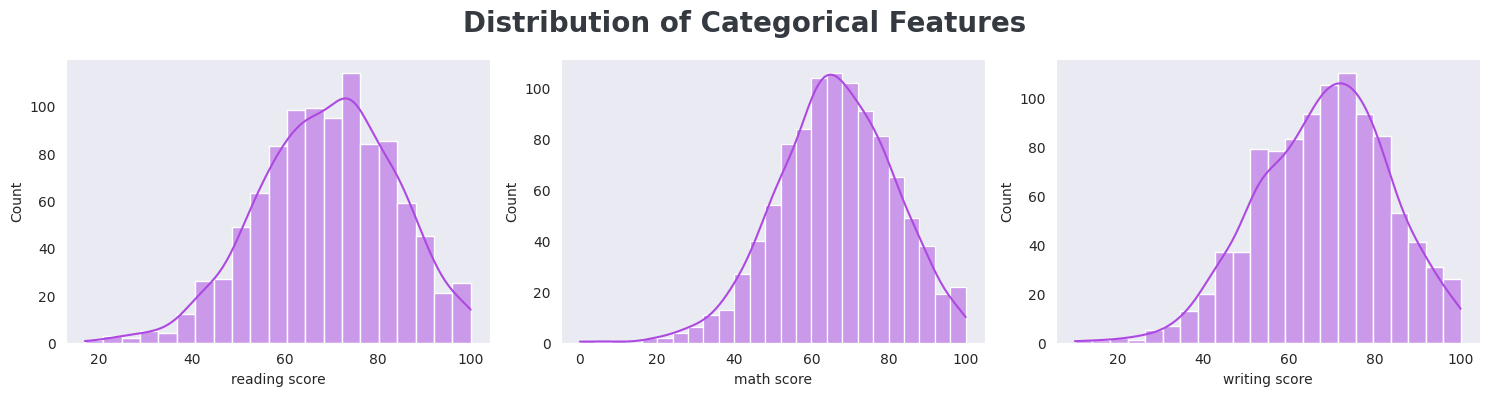

In [11]:
# Catrgorical Features Distribution
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axs=axs.flatten()

sns.histplot(data = df, x='reading score', kde=True,  color='#AD49E1', ax=axs[0])
sns.histplot(data = df, x='math score', kde=True, color='#AD49E1', ax=axs[1])
sns.histplot(data = df, x='writing score', kde=True, color='#AD49E1', ax=axs[2])

plt.suptitle("Distribution of Categorical Features",  fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout()
plt.show()

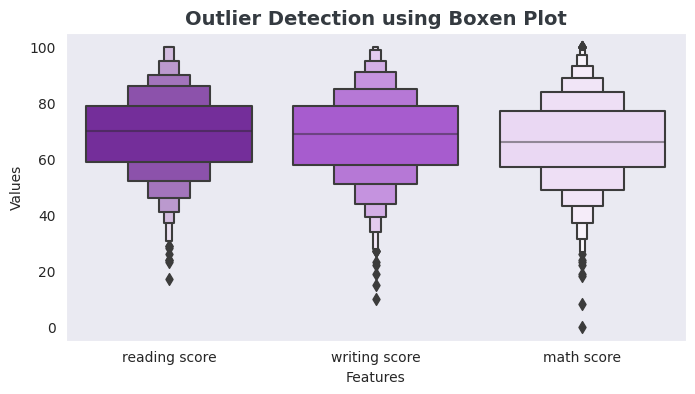

In [12]:
# Outlier detection
plt.figure(figsize=(8,4))
sns.boxenplot(df[['reading score', 'writing score', 'math score']], palette=['#7A1CAC', '#AD49E1', '#EBD3F8'])
plt.title('Outlier Detection using Boxen Plot', fontsize=14, fontweight='bold', color='#343A40')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

<body>
<div style="
background-color: #EBD3F8;
color: #7A1CAC;
padding-left: 10px;
padding-top: 10px;
border-radius: 8px;
font-family: 'Arial', sans-serif;
font-size: 1.4em;
font-weight: narrow;
margin: 0;
line-height: 1.6;
">

📊 Summary of Univariate Analysis<br>

<ul>
<li>👩‍🎓 <strong>Gender:</strong> 518 females, 482 males</li>
<li>👥 <strong>Ethnicity:</strong> Mostly Group C (319), followed by Group D (262), and others</li>
<li>🎓 <strong>Parental Education:</strong> Majority have some college (226) or an associate's degree (222)</li>
<li>🍽️ <strong>Lunch Type:</strong> Standard (645), Free/reduced (355)</li>
<li>📚 <strong>Test Prep:</strong> None (642), Completed (358)</li>
<li>📏 <strong>Scores:</strong> 
<ul>
<li>Math: Avg. 66.1</li>
<li>Reading: Avg. 69.2</li>
<li>Writing: Avg. 68.1</li>
</ul>
</li>
</ul>

</div>
</body>


<h2 style="
background-color: #EBD3F8;
color: #2E073F;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 1.6em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
">
2. Bivariate Analysis 
</h2>


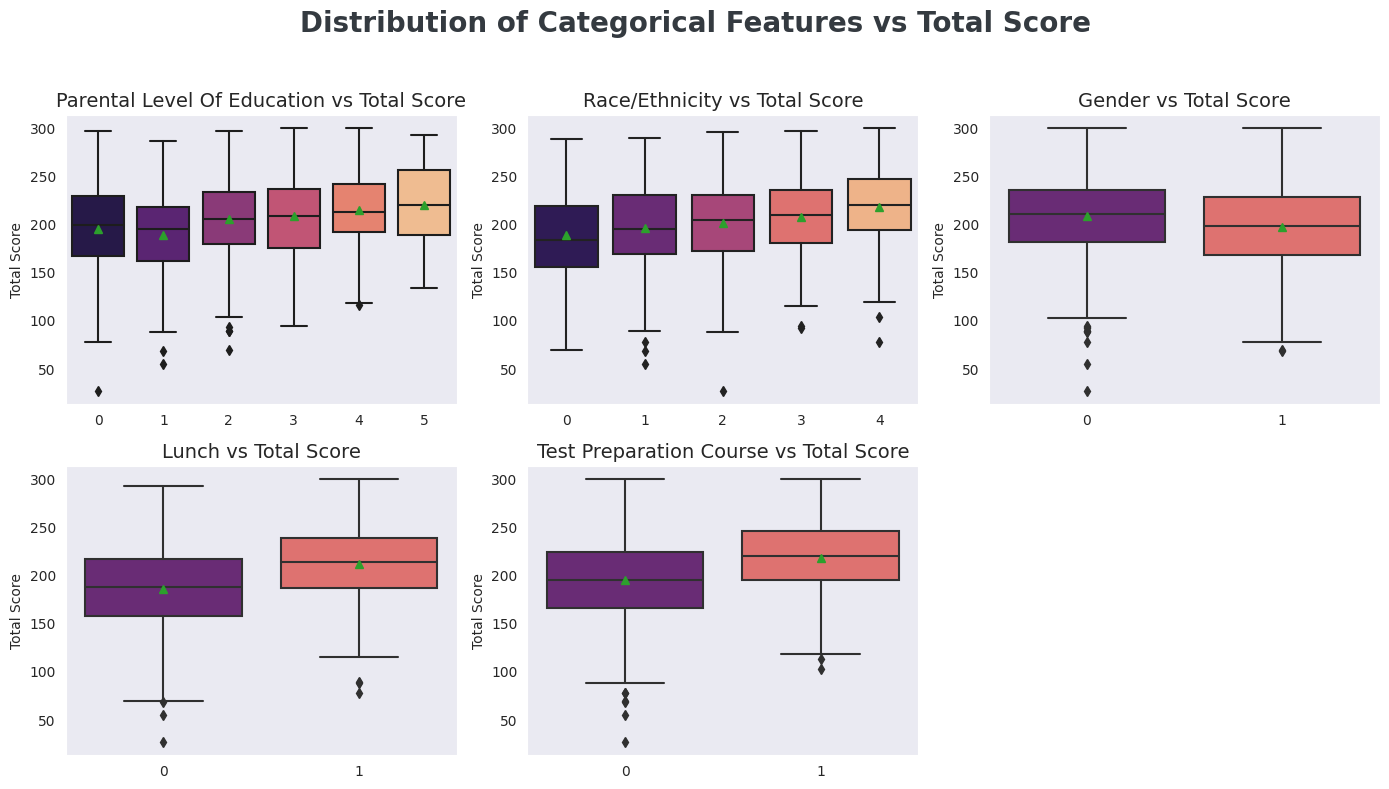

In [13]:
# List of categorical features to plot
categorical_features = ['parental level of education', 'race/ethnicity', 'gender', 'lunch', 'test preparation course']

# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))  
axs = axs.flatten()


for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='Total Score', showmeans=True,  data=df, palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Total Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Total Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()

plt.suptitle("Distribution of Categorical Features vs Total Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

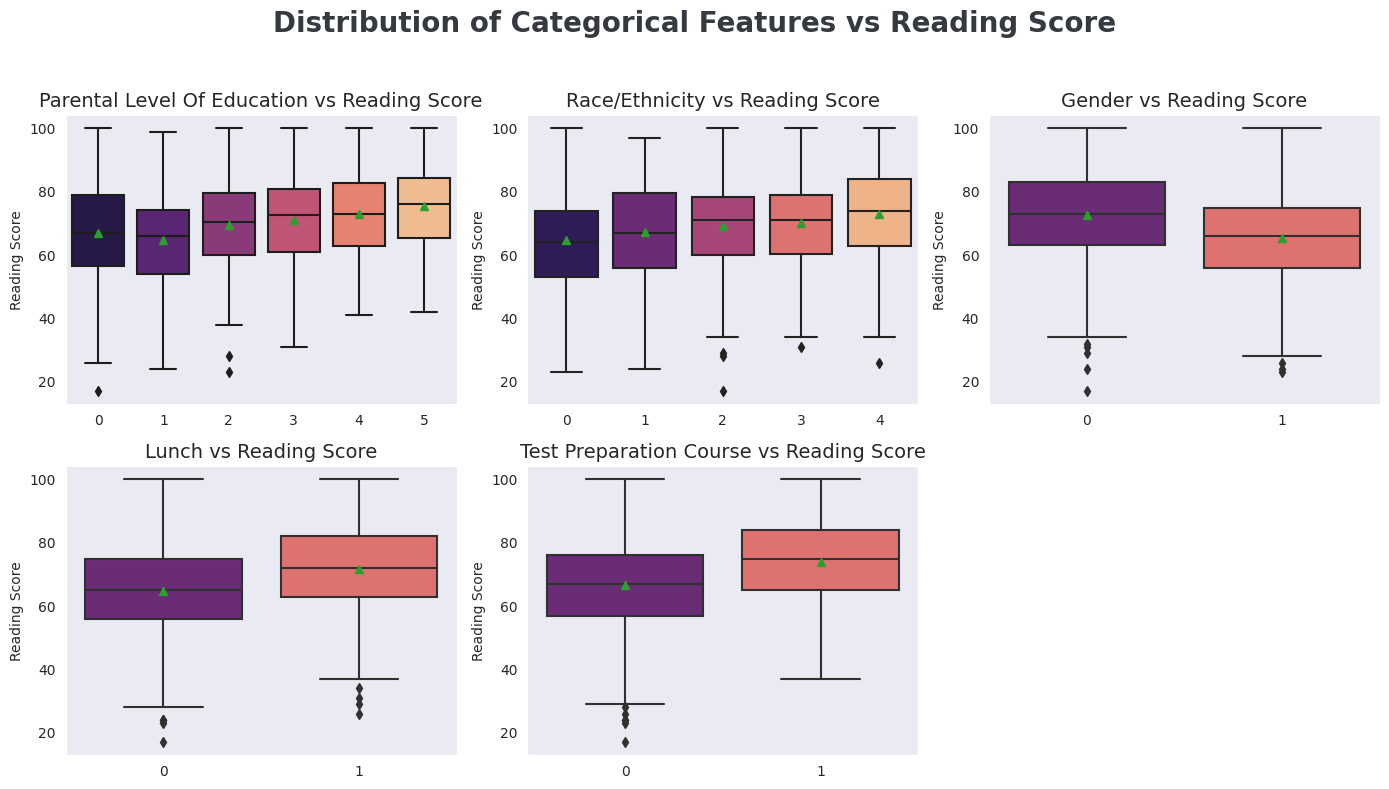

In [14]:
# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))  
axs = axs.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='reading score', showmeans=True, data=df, palette='magma', ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Reading Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Reading Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()
plt.suptitle("Distribution of Categorical Features vs Reading Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

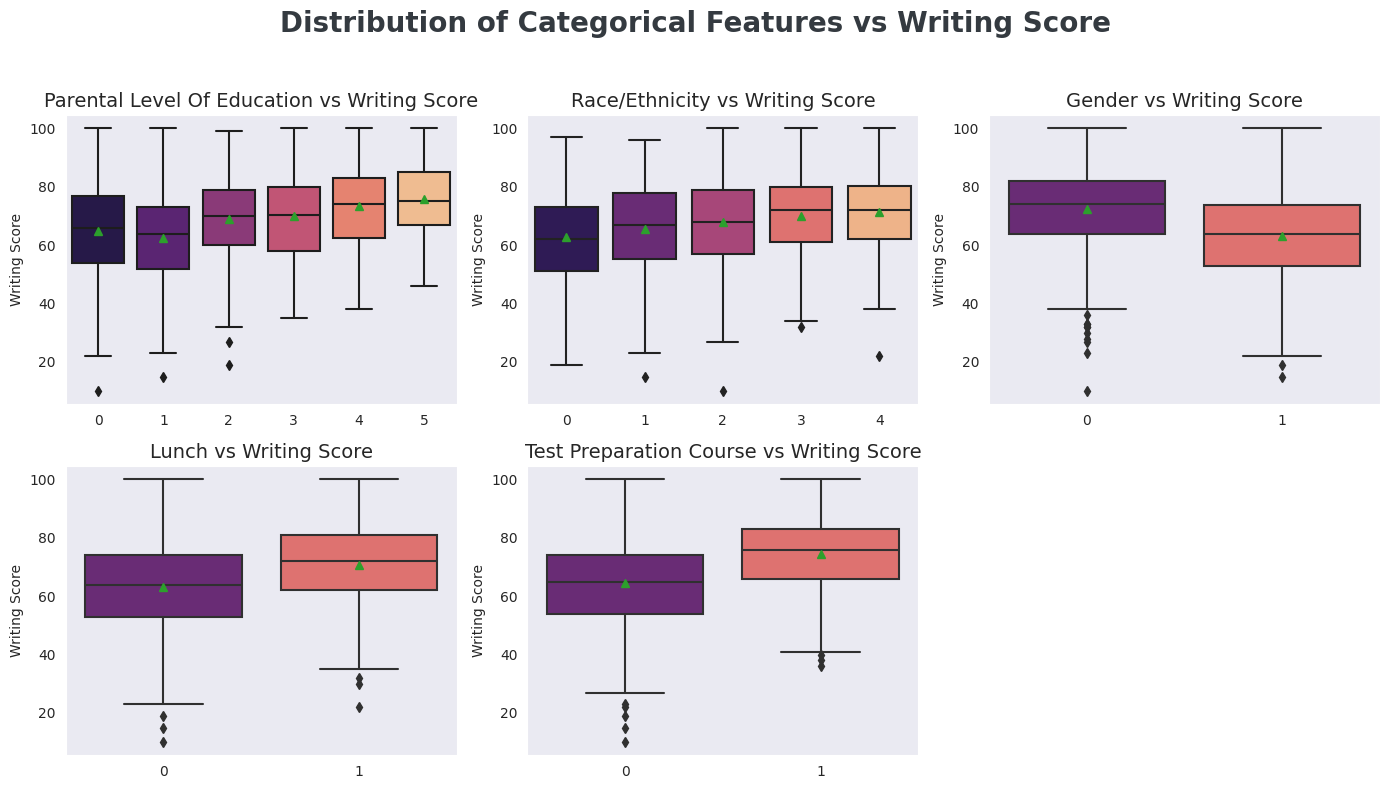

In [15]:
# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))  
axs = axs.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature,y='writing score',showmeans=True,  data=df,palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Writing Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Writing Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()
plt.suptitle("Distribution of Categorical Features vs Writing Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

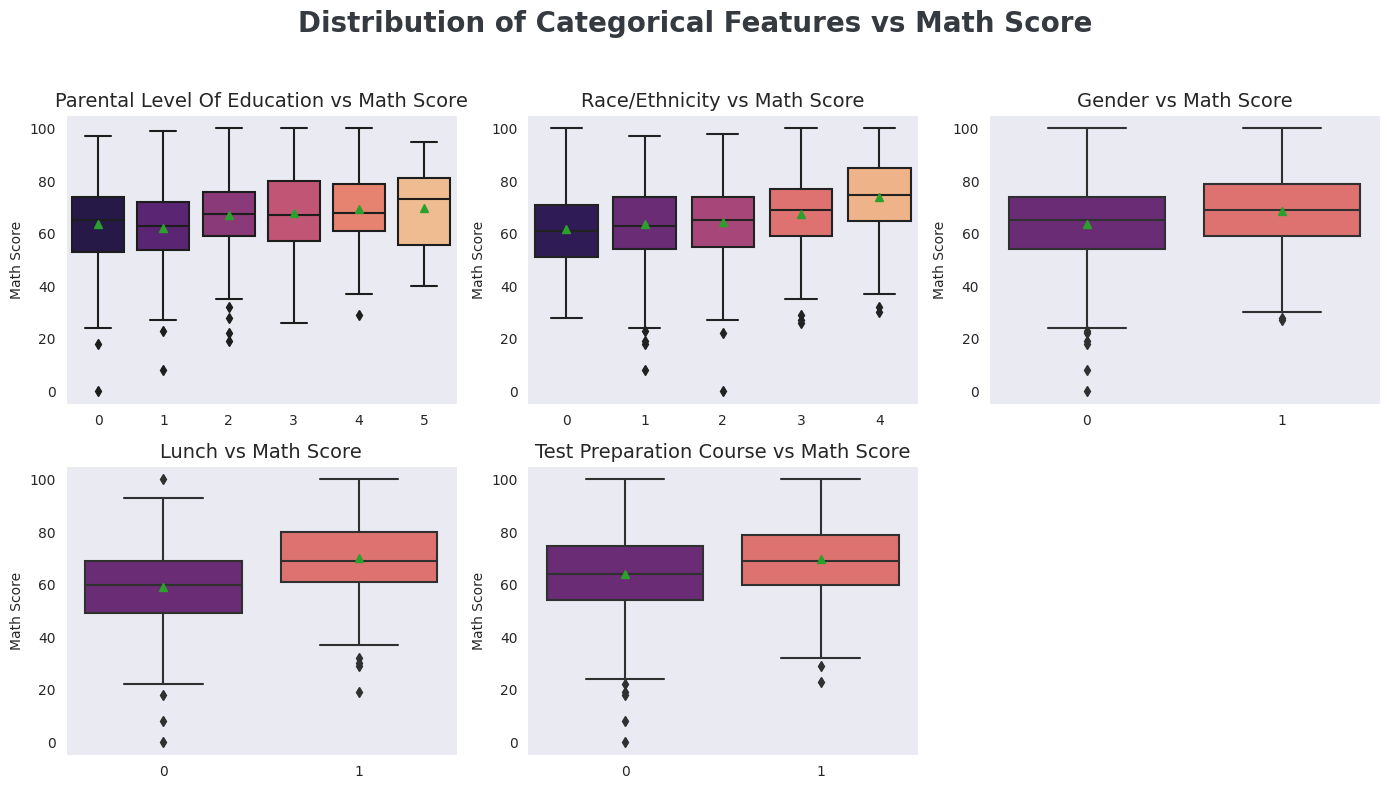

In [16]:
# Create a figure with adjusted size
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))  
axs = axs.flatten()

for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature,y='math score',showmeans=True, data=df,palette='magma',ax=axs[i])
    axs[i].set_title(f"{feature.replace('_', ' ').title()} vs Math Score", fontsize=14)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Math Score')
    axs[i].tick_params(axis='x', rotation=0)

axs[5].remove()
plt.suptitle("Distribution of Categorical Features vs Math Score", fontsize=20, fontweight='bold', color='#343A40')
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

<body>
<div style="
  background-color: #EBD3F8;
  color: #7A1CAC;
  padding-left: 10px;
  padding-top: 10px;
  border-radius: 8px;
  font-family: 'Arial', sans-serif;
  font-size: 1.4em;
  font-weight: narrow;
  margin: 0;
  line-height: 1.6;
">
📊 Summary of Academic Performance by Categories <br><br>

<ul>
  <li><strong>👩‍🏫 Gender:</strong>
    <ul>
      <li><strong>Total Scores:</strong> Females (208.71) outperform males (197.51).</li>
      <li><strong>Reading Scores:</strong> Females (72.61) have higher scores than males (65.47).</li>
      <li><strong>Writing Scores:</strong> Females (72.47) score higher than males (63.31).</li>
      <li><strong>Math Scores:</strong> Males (68.73) score higher than females (63.63).</li>
    </ul>
  </li>
  
  <li><strong>🌍 Race/Ethnicity:</strong>
    <ul>
      <li><strong>Total Scores:</strong> Scores increase from Group A (188.98) to Group E (218.26).</li>
      <li><strong>Reading Scores:</strong> Scores rise from Group A (64.67) to Group E (73.03).</li>
      <li><strong>Writing Scores:</strong> Scores grow from Group A (62.67) to Group E (71.41).</li>
      <li><strong>Math Scores:</strong> Scores improve from Group A (61.63) to Group E (73.82).</li>
    </ul>
  </li>
  
  <li><strong>🎓 Parental Education:</strong>
    <ul>
      <li><strong>Total Scores:</strong> Highest for master's degree (220.80) and lowest for high school (189.29).</li>
      <li><strong>Reading Scores:</strong> Highest for master's degree (75.37) and lowest for high school (64.70).</li>
      <li><strong>Writing Scores:</strong> Highest for master's degree (75.68) and lowest for high school (62.45).</li>
      <li><strong>Math Scores:</strong> Highest for master's degree (69.75) and lowest for high school (62.14).</li>
    </ul>
  </li>
  
  <li><strong>🍲 Lunch:</strong>
    <ul>
      <li><strong>Total Scores:</strong> Higher for standard lunch (212.51) than free/reduced (186.60).</li>
      <li><strong>Reading Scores:</strong> Higher for standard lunch (71.65) than free/reduced (64.65).</li>
      <li><strong>Writing Scores:</strong> Higher for standard lunch (70.82) than free/reduced (63.02).</li>
      <li><strong>Math Scores:</strong> Higher for standard lunch (70.03) than free/reduced (58.92).</li>
    </ul>
  </li>
  
  <li><strong>📚 Test Preparation:</strong>
    <ul>
      <li><strong>Total Scores:</strong> Higher for completed course (218.01) than none (195.12).</li>
      <li><strong>Reading Scores:</strong> Higher for completed course (73.89) than none (66.53).</li>
      <li><strong>Writing Scores:</strong> Higher for completed course (74.42) than none (64.50).</li>
      <li><strong>Math Scores:</strong> Higher for completed course (69.70) than none (64.08).</li>
    </ul>
  </li>
</ul>

</div>
</body>


<h2 style="
background-color: #EBD3F8;
color: #2E073F;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 1.6em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
">
3. Multivariate Analysis 
</h2>


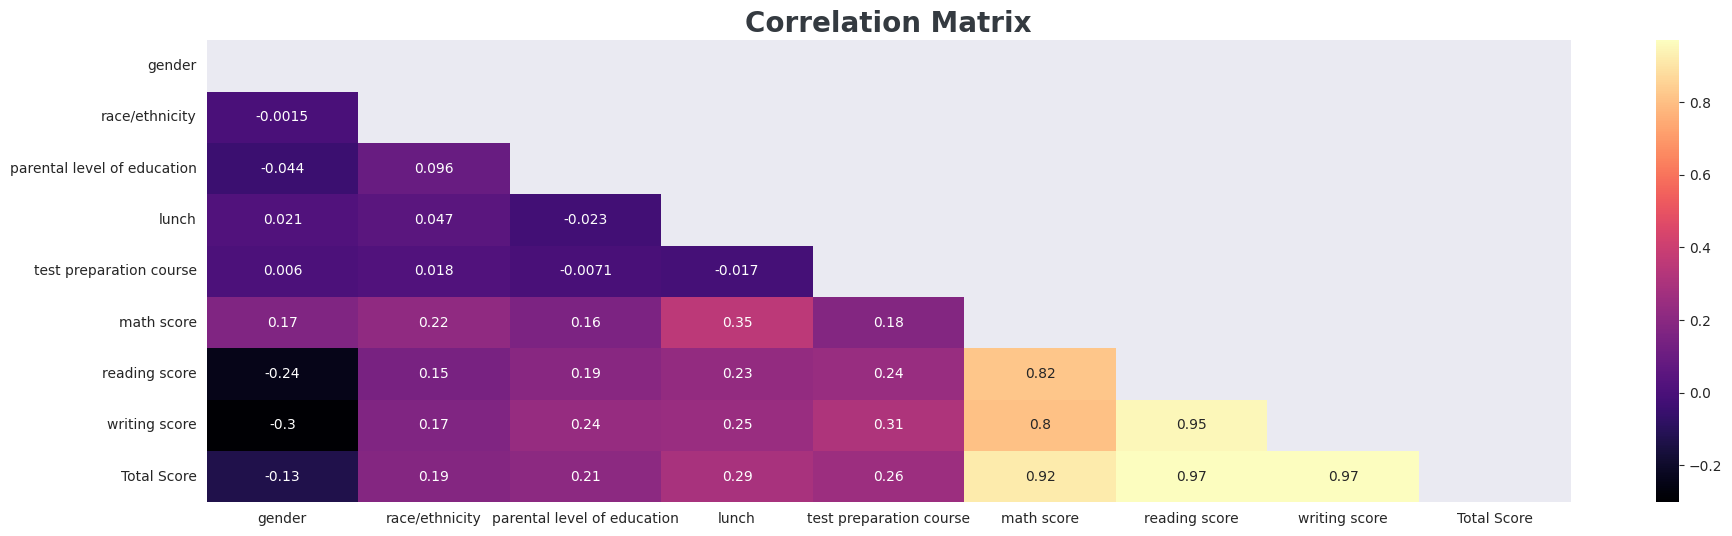

In [17]:
plt.figure(figsize=(22,6))
sns.heatmap(df.corr(), annot=True, cmap='magma', mask=np.triu(np.ones_like(df.corr(), dtype=bool)))
plt.title("Correlation Matrix", fontsize=20, fontweight='bold', color='#343A40')
plt.show()

<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
🧠 Model Training
</h1>


In [18]:
# scaling data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[df.columns.tolist()[:-1]])
scaled_data = pd.DataFrame(scaled_data, columns=df.columns[:-1])

In [19]:
# Perform PCA
pca = PCA(3)
pca_encoded = pca.fit_transform(scaled_data)

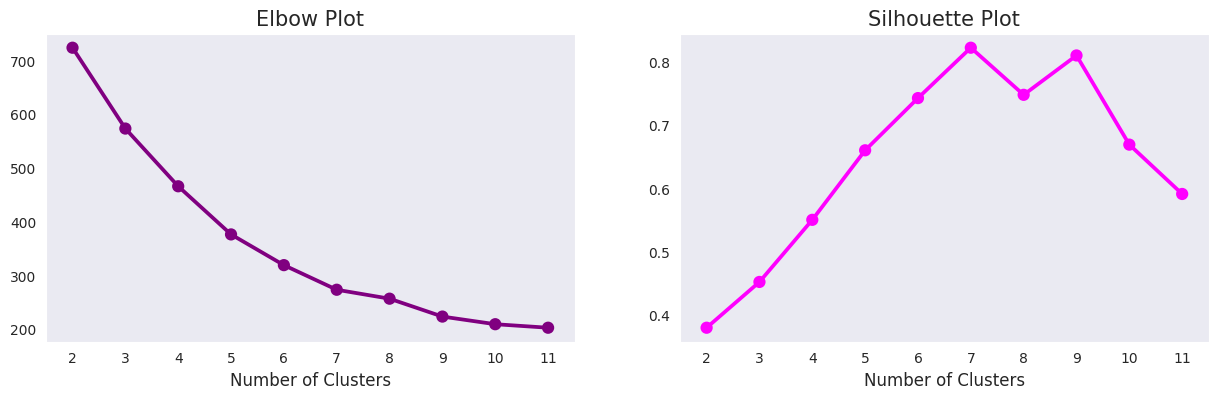

In [20]:
 # Identifying Optimal Value of K for KMeans Clustering
wcss = []
ss = []

for i in range(2,12):
    kmean = KMeans(n_clusters=i, n_init='auto', random_state=42)
    kmean.fit(scaled_data)
    wcss.append(kmean.inertia_)
    
    y = kmean.predict(scaled_data)
    s = silhouette_score(pca_encoded, y, random_state=0)
    ss.append(round(s, 5))

fig, axs = plt.subplots(1,2, figsize=(15, 4))
sns.pointplot(x=list(range(2, 12)), y=wcss, color='Purple', ax = axs[0])
axs[0].set_title("Elbow Plot", size=15)
axs[0].set_xlabel("Number of Clusters", size=12)

sns.pointplot(x=list(range(2, 12)), y=ss, ax=axs[1], color='magenta')
axs[1].set_title("Silhouette Plot", size=15)
axs[1].set_xlabel("Number of Clusters", size=12)
plt.show()

<div style="
  background-color: #EBD3F8;
  color: #7A1CAC;
  padding-left: 10px;
  padding-top: 10px;
  border-radius: 8px;
  font-family: 'Arial', sans-serif;
  font-size: 1.4em;
  font-weight: narrow;
  margin: 0;
  line-height: 1.6;
">
    
Note: Both the elbow and silhouette methods indicate that seven clusters are optimal for the K-means algorithm.

In [21]:
# Apply KMeans with 7 clusters
Clustering = KMeans(n_clusters=7, random_state=2).fit(pca_encoded)
labels = Clustering.labels_
df['Cluster'] = labels

# Perform PCA for 3 components for 3D plotting
pca_3d = PCA(n_components=3)
pca_df_3d = pca_3d.fit_transform(pca_encoded)
centers_3d = pca_3d.transform(Clustering.cluster_centers_)

fig = px.scatter_3d(
    x=pca_df_3d[:, 0],
    y=pca_df_3d[:, 1],
    z=pca_df_3d[:, 2],
    color=labels,
    title="KMeans Clustering with 4 Clusters (3D)",
    labels={'x': 'PCA Component 1', 'y': 'PCA Component 2', 'z': 'PCA Component 3'}
)

fig.add_scatter3d(
    x=centers_3d[:, 0],
    y=centers_3d[:, 1],
    z=centers_3d[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', symbol='x'),
    name='Centroids'
)

fig.show()


<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
🏁 Conclusion
</h1>


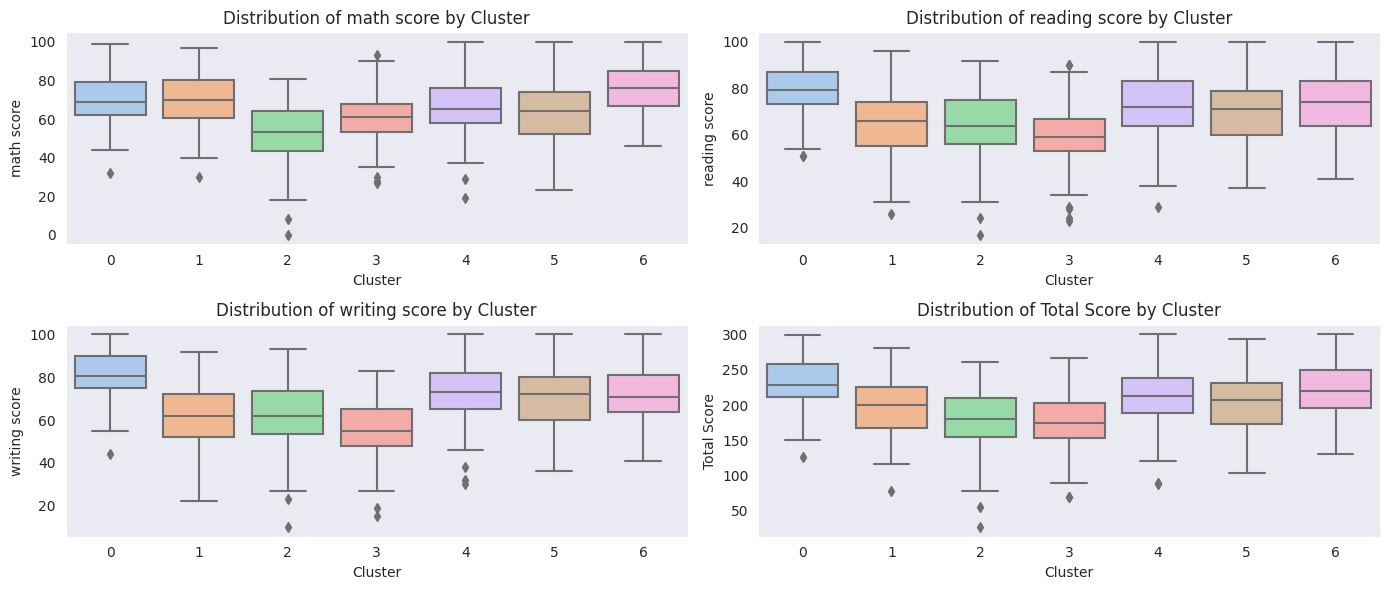

In [22]:
features = ['math score', 'reading score', 'writing score', 'Total Score']
plt.figure(figsize=(14, 6))
for feature in features:
    plt.subplot(2, 2, features.index(feature) + 1)
    sns.boxplot(data=df, x='Cluster', y=feature, palette='pastel')
    plt.title(f'Distribution of {feature} by Cluster')
plt.tight_layout()
plt.show()

<body>
<div style="
  background-color: #EBD3F8;
  color: #7A1CAC;
  padding-left: 10px;
  padding-top: 10px;
  border-radius: 8px;
  font-family: 'Arial', sans-serif;
  font-size: 1.4em;
  font-weight: narrow;
  margin: 0;
  line-height: 1.6;
">

Cluster Summary:

<ol>
  <li><strong>Cluster 0:</strong> 🎓
    <ul>
      <li><strong>Characteristics:</strong> Students with high parental education and who completed a test preparation course. They all have a standard lunch.</li>
      <li><strong>Academic Performance:</strong> Highest average scores across subjects, with a total score of 232.44.</li>
      <li><strong>Insight:</strong> High parental education combined with test preparation correlates with top academic performance. 🏆</li>
    </ul>
  </li>
  
  <li><strong>Cluster 1:</strong> 👦📚
    <ul>
      <li><strong>Characteristics:</strong> Predominantly male students with less parental education and no test preparation course. They have a standard lunch.</li>
      <li><strong>Academic Performance:</strong> Lower average scores, with a total score of 196.46.</li>
      <li><strong>Insight:</strong> Absence of test preparation and lower parental education lead to lower performance. 📉</li>
    </ul>
  </li>
  
  <li><strong>Cluster 2:</strong> 🚫📚
    <ul>
      <li><strong>Characteristics:</strong> Students with lower parental education and no test preparation. Lunch type varies.</li>
      <li><strong>Academic Performance:</strong> Lowest average scores with a total score of 178.50.</li>
      <li><strong>Insight:</strong> Lack of test preparation and lower parental education significantly impact performance negatively. 😔</li>
    </ul>
  </li>
  
  <li><strong>Cluster 3:</strong> 🍲📉
    <ul>
      <li><strong>Characteristics:</strong> Students with varied parental education levels and no test preparation course. Many receive free/reduced lunch.</li>
      <li><strong>Academic Performance:</strong> Scores similar to Cluster 2, with a total score of 174.97.</li>
      <li><strong>Insight:</strong> Free/reduced lunch and absence of test preparation are linked to lower scores. 🏚️</li>
    </ul>
  </li>
  
  <li><strong>Cluster 4:</strong> 🎓📉
    <ul>
      <li><strong>Characteristics:</strong> Students with moderate parental education and no test preparation. Standard lunch is common.</li>
      <li><strong>Academic Performance:</strong> Mid-range scores, with a total score of 212.88.</li>
      <li><strong>Insight:</strong> Moderate parental education and no test preparation result in better scores compared to Clusters 2 and 3 but not as high as Cluster 0. 🔄</li>
    </ul>
  </li>
  
  <li><strong>Cluster 5:</strong> 📘💪
    <ul>
      <li><strong>Characteristics:</strong> Mixed parental education levels with some completing a test preparation course. Lunch types vary.</li>
      <li><strong>Academic Performance:</strong> Mid to high scores, with a total score of 203.27.</li>
      <li><strong>Insight:</strong> Test preparation and varied parental education levels contribute to improved performance. 🌟</li>
    </ul>
  </li>
  
  <li><strong>Cluster 6:</strong> 🎓📚
    <ul>
      <li><strong>Characteristics:</strong> Students with high parental education and who completed a test preparation course. They all have a standard lunch.</li>
      <li><strong>Academic Performance:</strong> High scores across subjects, with a total score of 220.54.</li>
      <li><strong>Insight:</strong> High parental education and test preparation, combined with a standard lunch, lead to excellent academic performance. 💯</li>
    </ul>
  </li>
</ol>

<hr style="border: 1px solid #7A1CAC;">

<p>This summary highlights how parental education, test preparation, and lunch type impact academic performance across various clusters. Higher parental education and completion of a test preparation course are consistently associated with better outcomes. These insights can guide targeted educational strategies to enhance student performance effectively. 🌟📈</p>

</div>
</body>


<h1 style="
background-color: #7A1CAC;
color: #EBD3F8;
padding: 20px;
border-radius: 10px;
text-align: left;
font-family: 'Arial', sans-serif;
font-size: 2em;
text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.4);
box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
text-shadow: 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff, 1px 1px 1px #fff;
">
I'd really appreciate it, if you could take a moment to upvote my work.<br>
As a new member to this commmuity your support means a lot to me.😊
</h1>